<a href="https://colab.research.google.com/github/noslide5/proyecto20251/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [4]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
from local.lib import mlutils
%matplotlib inline
d = pd.read_csv("train.csv")
d.head()



,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [5]:
print (d.shape)

(692500, 21)


In [16]:
k = d.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_EDUCACIONMADRE,23664


In [6]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
  FAMI_TIENELAVADORA object
 FAMI_TIENEAUTOMOVIL object
ESTU_PRIVADO_LIBERTAD object
ESTU_PAGOMATRICULAPROPIO object
FAMI_TIENECOMPUTADOR object
FAMI_TIENEINTERNET.1 object
 FAMI_EDUCACIONMADRE object
  RENDIMIENTO_GLOBAL object
              coef_1 float64
              coef_2 float64
              coef_3 float64
              coef_4 float64


In [9]:
## KEEPOUTPUT
def plot_missing(col, target):

    def f1():

        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(x=k.index, y=k.values)
        else:
            plt.hist(d[col].dropna().values, bins=100)
        plt.title("distribution of %s"%col)
        plt.grid()

    def f2():
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.histplot(k[target][k[col]==v], kde=True,
                                 label=v, alpha=.3);
            if sum(d[col].isna())>1:
                sns.histplot(d[target][d[col].isna()],
                             alpha=.8, kde=True,
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))

    def f3():
        n = np.sum(d[col].isna())
        if n>1:
            sns.histplot(d[target][d[col].isna()], color="red", kde=True, alpha=.3, label="missing (%d values)"%n)
        sns.histplot(d[target][~d[col].isna()], color="blue", kde=True, alpha=.3, label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()

    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))

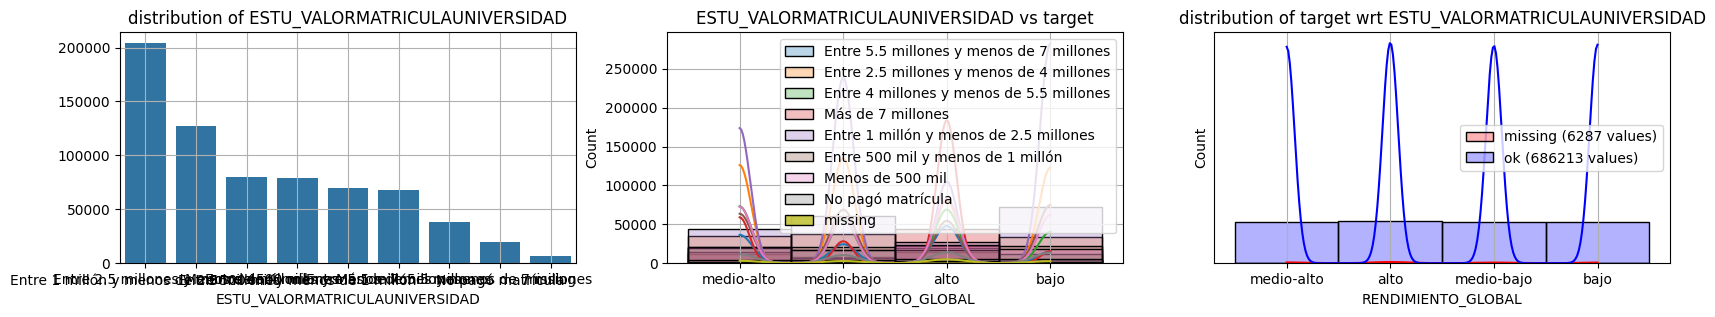

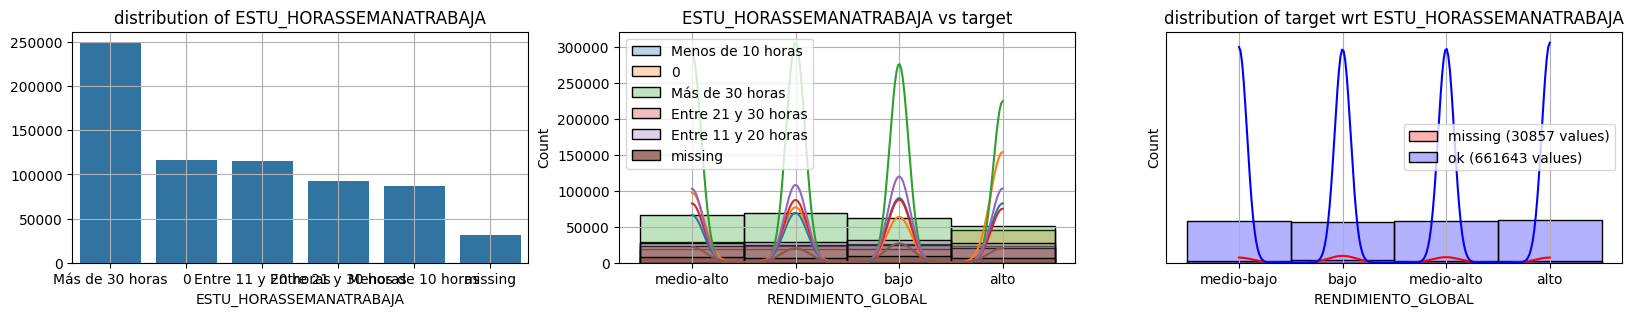

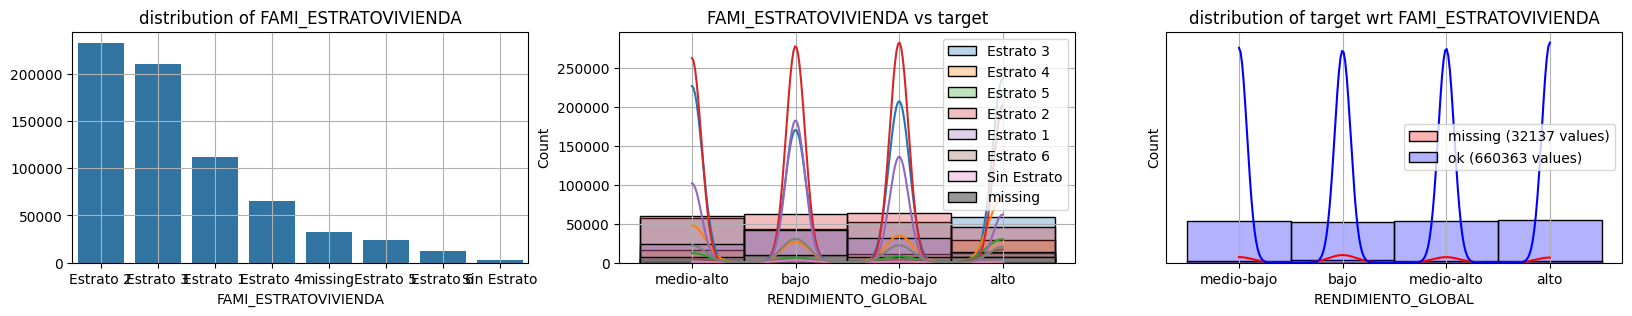

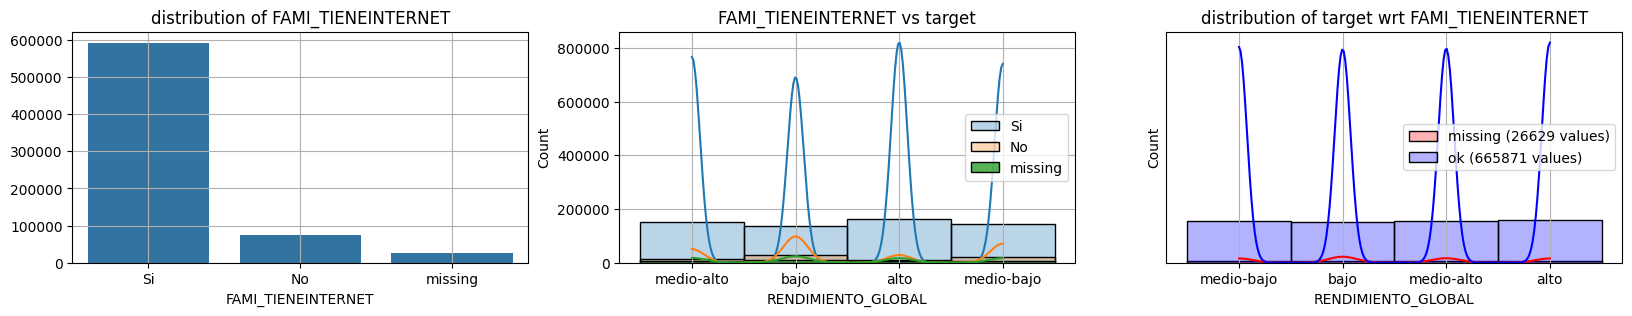

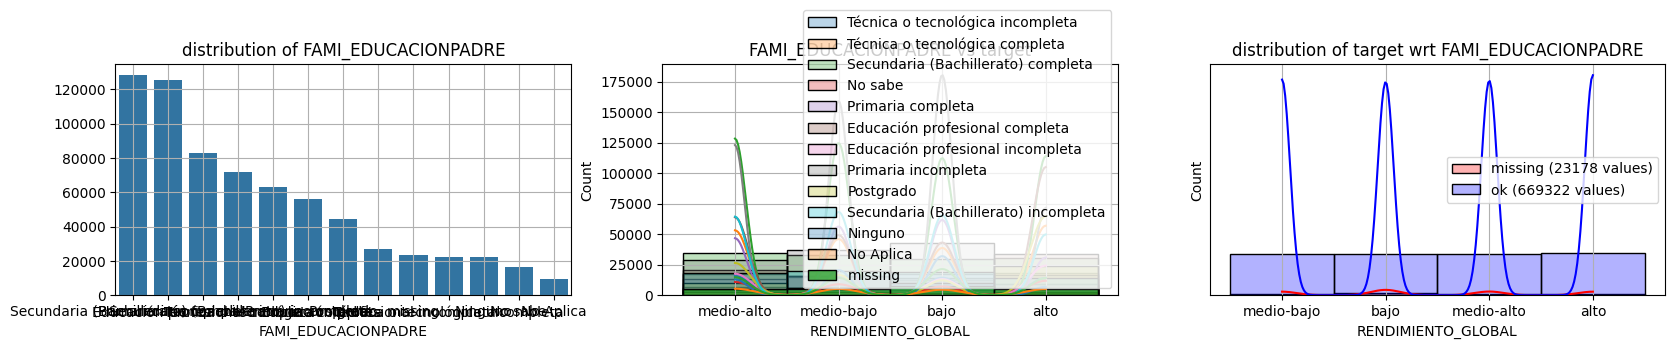

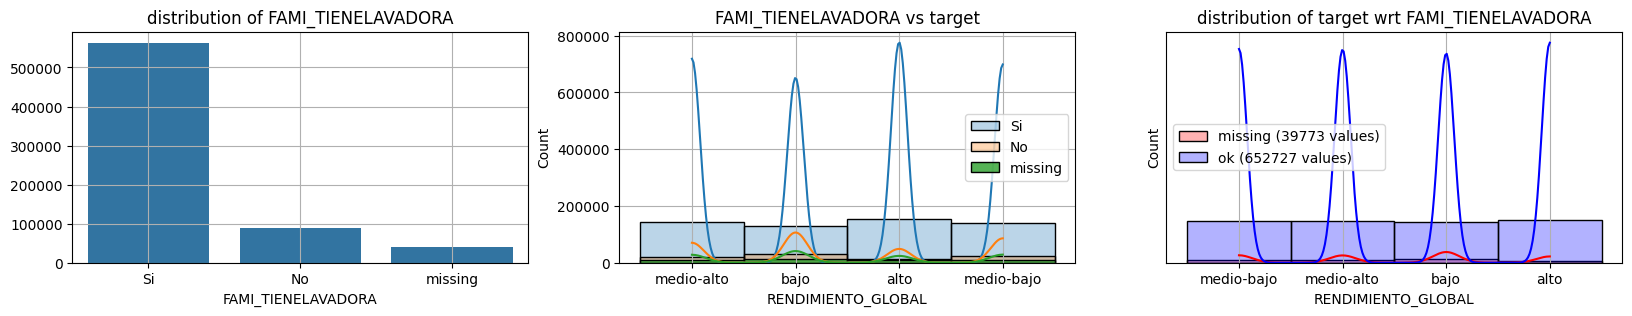

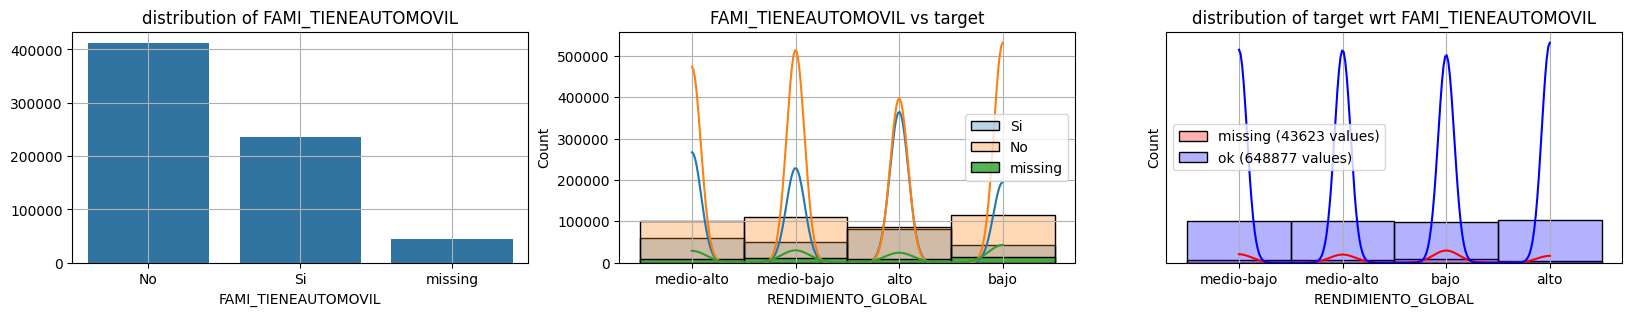

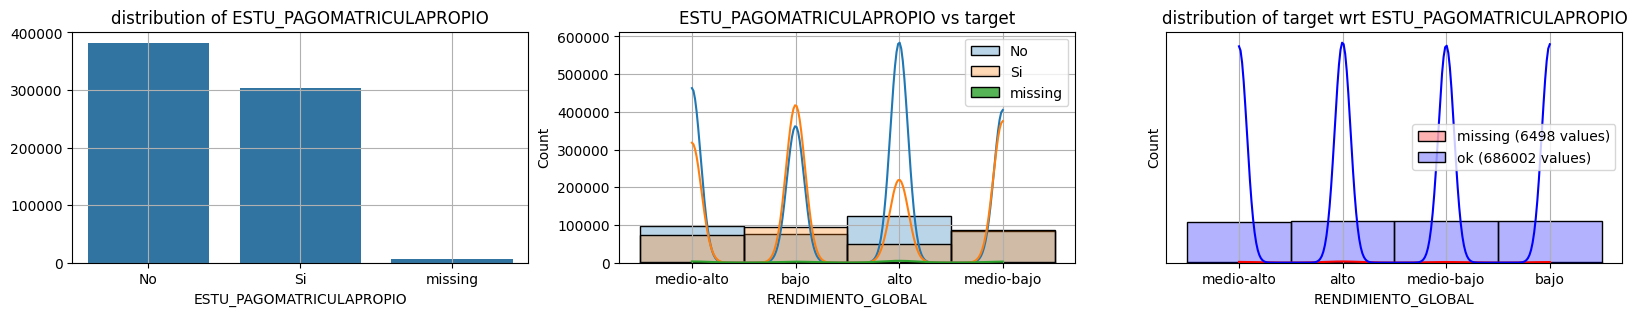

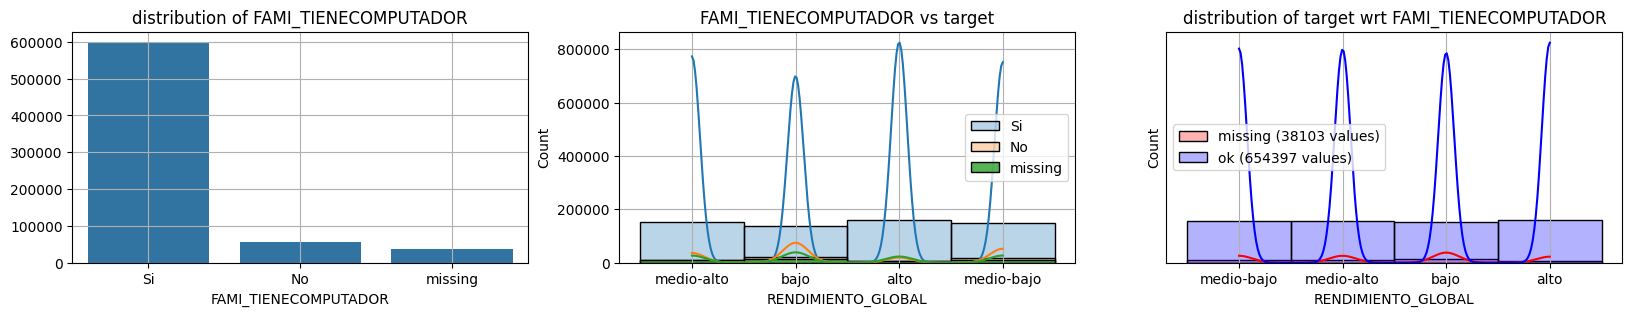

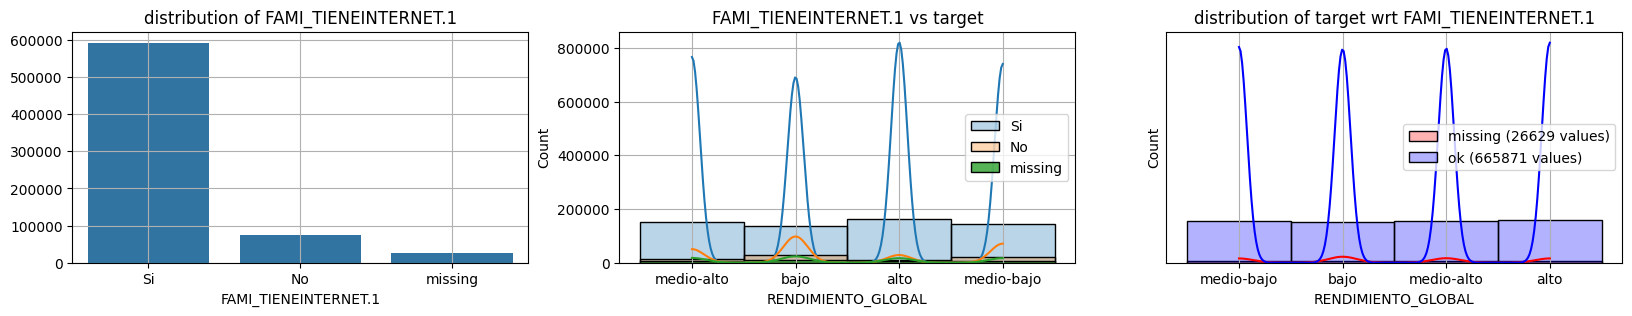

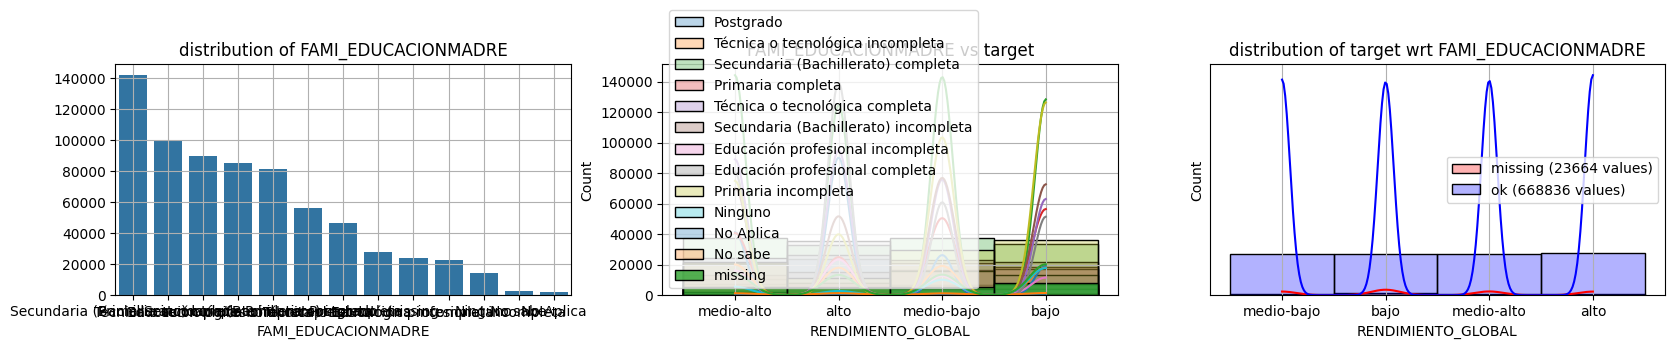

In [10]:
for col in k[k!=0].index:
    plot_missing(col, target="RENDIMIENTO_GLOBAL")

matriz de datos numericos

In [11]:

datos_numericos = d.select_dtypes(include=[np.number])
datos_numericos.head()


,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
0,904256,20212,0.322,0.208,0.310,0.267
1,645256,20212,0.311,0.215,0.292,0.264
2,308367,20203,0.297,0.214,0.305,0.264
3,470353,20195,0.485,0.172,0.252,0.190
4,989032,20212,0.316,0.232,0.285,0.294


crear una matriz con los valores faltantes como cero

In [12]:
datos_cero = d.fillna(0)
datos_cero.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [13]:
k = datos_cero.isna().sum()
k[k!=0]

,0


eliminar columnas repetidas

In [14]:
# Revisar si son iguales
(d['FAMI_TIENEINTERNET'] == d['FAMI_TIENEINTERNET.1']).value_counts()

# Si son iguales, podemos eliminar una
d = d.drop(columns=['FAMI_TIENEINTERNET.1'])


matriz con valores vacios reemplazados por la media

In [15]:

datos_ohe = d.copy()
datos_ohe = pd.get_dummies(datos_ohe)
datos_ohe.head()


,ID,PERIODO,coef_1,coef_2,coef_3,coef_4,ESTU_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,...,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo
0,904256,20212,0.322,0.208,0.310,0.267,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,645256,20212,0.311,0.215,0.292,0.264,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,308367,20203,0.297,0.214,0.305,0.264,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,470353,20195,0.485,0.172,0.252,0.190,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,989032,20212,0.316,0.232,0.285,0.294,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
